In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

import pickle
import copy

import datetime

In [2]:
df = pd.read_csv('CollegeMsg/CollegeMsg.txt', sep=" ", names=['SRC','TGT','UNIXTS'])

In [3]:
df['SRC'] = df['SRC'] - 1
df['TGT'] = df['TGT'] - 1

In [6]:
df.head(5)

,SRC,TGT,UNIXTS
0,0,1,1082040961
1,2,3,1082155839
2,4,1,1082414391
3,5,6,1082439619
4,7,6,1082439756


In [5]:
df.tail(5)

,SRC,TGT,UNIXTS
59830,1898,1846,1098776648
59831,1898,1096,1098776836
59832,1898,276,1098777003
59833,1877,1623,1098777111
59834,1877,1623,1098777142


In [7]:
uniq_SRC = df.SRC.unique()
uniq_TGT = df.TGT.unique()
uniq_union_user = list(set(uniq_SRC) | set(uniq_TGT))
print("Uniq Union User: ", len(uniq_union_user))

Uniq Union User:  1899


In [8]:
df = df.iloc[2:]

In [9]:
df.head(5)

,SRC,TGT,UNIXTS
2,4,1,1082414391
3,5,6,1082439619
4,7,6,1082439756
5,8,9,1082440403
6,8,10,1082440453


## 1-day Snapshots

In [38]:
df['DAY'] = df['UNIXTS'] / 86400
df['DAY'] = df['DAY'].round(0).astype(int) - 1

In [39]:
df.head(5)

,SRC,TGT,UNIXTS,WEEK,MONTH,DAY
2,4,1,1082414391,17,4,12527
3,5,6,1082439619,17,4,12527
4,7,6,1082439756,17,4,12527
5,8,9,1082440403,17,4,12527
6,8,10,1082440453,17,4,12527


In [40]:
days = sorted(df['DAY'].unique())

In [41]:
G_list = []
G_dir_list = []
day_groups = df.groupby("DAY")


for e,day in enumerate(days):
    print("{}/{}".format(e,len(days)))
    
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    try:
        group = day_groups.get_group(day)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)

    except:
        print("No messages in: ",day)
    G_list.append(G)
    G_dir_list.append(G_dir)

0/190
1/190
2/190
3/190
4/190
5/190
6/190
7/190
8/190
9/190
10/190
11/190
12/190
13/190
14/190
15/190
16/190
17/190
18/190
19/190
20/190
21/190
22/190
23/190
24/190
25/190
26/190
27/190
28/190
29/190
30/190
31/190
32/190
33/190
34/190
35/190
36/190
37/190
38/190
39/190
40/190
41/190
42/190
43/190
44/190
45/190
46/190
47/190
48/190
49/190
50/190
51/190
52/190
53/190
54/190
55/190
56/190
57/190
58/190
59/190
60/190
61/190
62/190
63/190
64/190
65/190
66/190
67/190
68/190
69/190
70/190
71/190
72/190
73/190
74/190
75/190
76/190
77/190
78/190
79/190
80/190
81/190
82/190
83/190
84/190
85/190
86/190
87/190
88/190
89/190
90/190
91/190
92/190
93/190
94/190
95/190
96/190
97/190
98/190
99/190
100/190
101/190
102/190
103/190
104/190
105/190
106/190
107/190
108/190
109/190
110/190
111/190
112/190
113/190
114/190
115/190
116/190
117/190
118/190
119/190
120/190
121/190
122/190
123/190
124/190
125/190
126/190
127/190
128/190
129/190
130/190
131/190
132/190
133/190
134/190
135/190
136/190
137/190
138/19

Text(0.5, 1.0, 'Num of Edges in 1-day Snapshots')

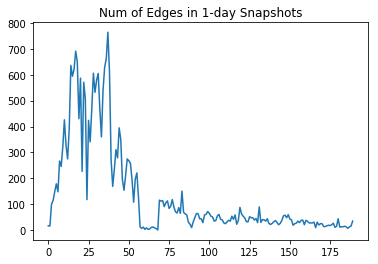

In [42]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in 1-day Snapshots")

In [43]:
with open("CollegeMsg/Graphs/msg_1_day_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_1_day_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## 1-day Aggregates

In [44]:
G_list = []
G_dir_list = []
day_groups = df.groupby("DAY")

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

for e,day in enumerate(days):
    print("{}/{}".format(e,len(days)))
    
    try:
        group = day_groups.get_group(day)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)
    except:
        print("No messages in: ", day)
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

0/190
1/190
2/190
3/190
4/190
5/190
6/190
7/190
8/190
9/190
10/190
11/190
12/190
13/190
14/190
15/190
16/190
17/190
18/190
19/190
20/190
21/190
22/190
23/190
24/190
25/190
26/190
27/190
28/190
29/190
30/190
31/190
32/190
33/190
34/190
35/190
36/190
37/190
38/190
39/190
40/190
41/190
42/190
43/190
44/190
45/190
46/190
47/190
48/190
49/190
50/190
51/190
52/190
53/190
54/190
55/190
56/190
57/190
58/190
59/190
60/190
61/190
62/190
63/190
64/190
65/190
66/190
67/190
68/190
69/190
70/190
71/190
72/190
73/190
74/190
75/190
76/190
77/190
78/190
79/190
80/190
81/190
82/190
83/190
84/190
85/190
86/190
87/190
88/190
89/190
90/190
91/190
92/190
93/190
94/190
95/190
96/190
97/190
98/190
99/190
100/190
101/190
102/190
103/190
104/190
105/190
106/190
107/190
108/190
109/190
110/190
111/190
112/190
113/190
114/190
115/190
116/190
117/190
118/190
119/190
120/190
121/190
122/190
123/190
124/190
125/190
126/190
127/190
128/190
129/190
130/190
131/190
132/190
133/190
134/190
135/190
136/190
137/190
138/19

In [45]:
with open("CollegeMsg/Graphs/msg_1_day_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list,file)
    
with open("CollegeMsg/Graphs/msg_1_day_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## 1-week Snapshots

In [10]:
df['WEEK'] = 0
for index, row in df.iterrows():
    row['WEEK'] = datetime.datetime.fromtimestamp(row['UNIXTS']).isocalendar()[1]

In [11]:
df.head(5)

,SRC,TGT,UNIXTS,WEEK
2,4,1,1082414391,17
3,5,6,1082439619,17
4,7,6,1082439756,17
5,8,9,1082440403,17
6,8,10,1082440453,17


In [12]:
weeks = sorted(df['WEEK'].unique())

In [13]:
len(weeks)

28

In [14]:
G_list = []
G_dir_list = []
week_groups = df.groupby("WEEK")


for e,week in enumerate(weeks):
    print("{}/{}".format(e,len(weeks)))
    
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    try:
        group = week_groups.get_group(week)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)

    except:
        print("No messages in: ",week)
    G_list.append(G)
    G_dir_list.append(G_dir)

0/28
1/28
2/28
3/28
4/28
5/28
6/28
7/28
8/28
9/28
10/28
11/28
12/28
13/28
14/28
15/28
16/28
17/28
18/28
19/28
20/28
21/28
22/28
23/28
24/28
25/28
26/28
27/28


Text(0.5, 1.0, 'Num of Edges in 1-week Snapshots')

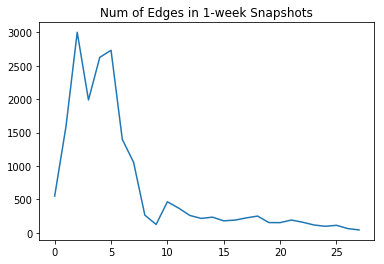

In [15]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in 1-week Snapshots")

In [16]:
with open("CollegeMsg/Graphs/msg_1_week_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_1_week_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## 1-week Aggregates

In [17]:
G_list = []
G_dir_list = []
week_groups = df.groupby("WEEK")

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

for e,week in enumerate(weeks):
    print("{}/{}".format(e,len(weeks)))
    
    try:
        group = week_groups.get_group(week)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)
    except:
        print("No messages in {}".format(week))
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

0/28
1/28
2/28
3/28
4/28
5/28
6/28
7/28
8/28
9/28
10/28
11/28
12/28
13/28
14/28
15/28
16/28
17/28
18/28
19/28
20/28
21/28
22/28
23/28
24/28
25/28
26/28
27/28


In [18]:
with open("CollegeMsg/Graphs/msg_1_week_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list,file)
    
with open("CollegeMsg/Graphs/msg_1_week_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## 1-month Snapshots

In [19]:
df['MONTH'] = 0
for index, row in df.iterrows():
    row['MONTH'] = datetime.datetime.fromtimestamp(row['UNIXTS']).month

In [20]:
df.head(5)

,SRC,TGT,UNIXTS,WEEK,MONTH
2,4,1,1082414391,17,4
3,5,6,1082439619,17,4
4,7,6,1082439756,17,4
5,8,9,1082440403,17,4
6,8,10,1082440453,17,4


In [21]:
months = sorted(df['MONTH'].unique())

In [22]:
len(months)

7

In [23]:
G_list = []
G_dir_list = []
month_groups = df.groupby("MONTH")


for e,month in enumerate(months):
    print("{}/{}".format(e,len(months)))
    
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    try:
        group = month_groups.get_group(month)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)

    except:
        print("No messages in: ", month)
    G_list.append(G)
    G_dir_list.append(G_dir)

0/7
1/7
2/7
3/7
4/7
5/7
6/7


In [24]:
G_list[6].number_of_nodes()

1899

Text(0.5, 1.0, 'Num of Edges in 1-month Snapshots')

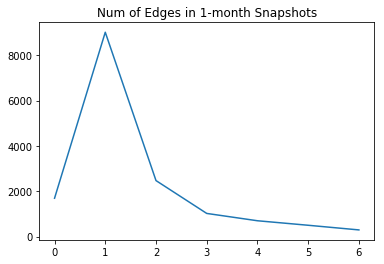

In [25]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in 1-month Snapshots")

In [26]:
with open("CollegeMsg/Graphs/msg_1_month_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_1_month_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

In [27]:
G_list = []
G_dir_list = []
month_groups = df.groupby("MONTH")

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

for e,month in enumerate(months):
    print("{}/{}".format(e,len(months)))
    
    try:
        group = month_groups.get_group(month)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)
    except:
        print("No messages in :", month)
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

0/7
1/7
2/7
3/7
4/7
5/7
6/7


In [28]:
with open("CollegeMsg/Graphs/msg_1_month_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list,file)
    
with open("CollegeMsg/Graphs/msg_1_month_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

In [29]:
len(df)

59833

In [30]:
len(df) / 28

2136.8928571428573

## Equal-edges Snapshots

In [31]:
G_list = []
G_dir_list = []

slice_num = 28;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            G[u][v]["weight"] += 1

            G_dir[u][v]["weight"] += 1
            G_dir[v][u]["weight"] += 1
        else: 
            G.add_edge(u,v,weight=1)
            G_dir.add_edge(u,v,weight=1)
            G_dir.add_edge(v,u,weight=1)
            
    G_list.append(G)
    G_dir_list.append(G_dir)

Text(0.5, 1.0, 'Num of Edges in equal-edge Snapshots')

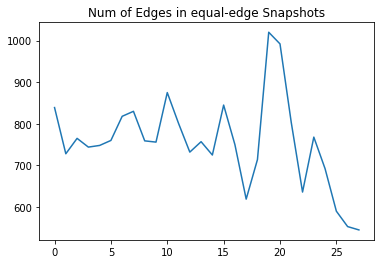

In [32]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in equal-edge Snapshots")

In [33]:
df.tail(5)

,SRC,TGT,UNIXTS,WEEK,MONTH
59830,1898,1846,1098776648,44,10
59831,1898,1096,1098776836,44,10
59832,1898,276,1098777003,44,10
59833,1877,1623,1098777111,44,10
59834,1877,1623,1098777142,44,10


In [34]:
with open("CollegeMsg/Graphs/msg_equal_edge_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_equal_edge_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## Equal-edges Aggregates

In [35]:
G_list = []
G_dir_list = []

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

slice_num = 28;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            G[u][v]["weight"] += 1

            G_dir[u][v]["weight"] += 1
            G_dir[v][u]["weight"] += 1
        else: 
            G.add_edge(u,v,weight=1)
            G_dir.add_edge(u,v,weight=1)
            G_dir.add_edge(v,u,weight=1)
            
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

Text(0.5, 1.0, 'Num of Edges in equal-edge Aggregates')

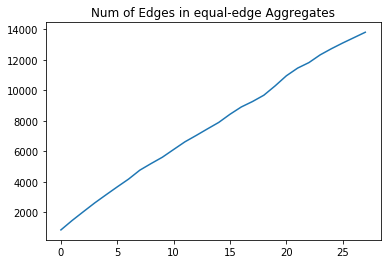

In [36]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in equal-edge Aggregates")

In [37]:
with open("CollegeMsg/Graphs/msg_equal_edge_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_equal_edge_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)